<a href="https://colab.research.google.com/github/Vinitladse/NETFLIX-MOVIES-AND-TV-SHOWS-CLUSTERING/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [88]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
data = pd.read_csv('/content/drive/MyDrive/dataset/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

In [90]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [91]:
data.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


In [92]:

data.shape

(7787, 12)

In [93]:
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [94]:
data.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [95]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [96]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [97]:
data['rating'].value_counts()

TV-MA       2863
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [98]:
data['country'].value_counts()

United States                                                   2555
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [99]:
data['rating'].replace(np.nan, 'TV-MA', inplace = True)

In [100]:
data['rating'].value_counts()

TV-MA       2870
TV-14       1931
TV-PG        806
R            665
PG-13        386
TV-Y         280
TV-Y7        271
PG           247
TV-G         194
NR            84
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [101]:
data['country'].replace(np.nan, 'United States', inplace = True)

In [102]:
data['country'].value_counts()

United States                                                   3062
India                                                            923
United Kingdom                                                   397
Japan                                                            226
South Korea                                                      183
                                                                ... 
Russia, United States, China                                       1
Italy, Switzerland, France, Germany                                1
United States, United Kingdom, Canada                              1
United States, United Kingdom, Japan                               1
Sweden, Czech Republic, United Kingdom, Denmark, Netherlands       1
Name: country, Length: 681, dtype: int64

In [103]:
data['cast'].replace(np.nan, 'missing info', inplace = True)

In [104]:
data = data.drop(columns = ['director'], axis =1)

In [105]:
data = data[data['date_added'].notna()]

In [106]:
data['year_added'] = data['date_added'].apply(lambda x: x.split(" ")[-1])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [107]:
data.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added
0,s1,TV Show,3%,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020
1,s2,Movie,7:19,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016
2,s3,Movie,23:59,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018
3,s4,Movie,9,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017
4,s5,Movie,21,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020


In [108]:
data.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

# **Exploratory Data Analysis**

In [109]:
# Check the Duplicates entries
len (data[data.duplicated()])

0

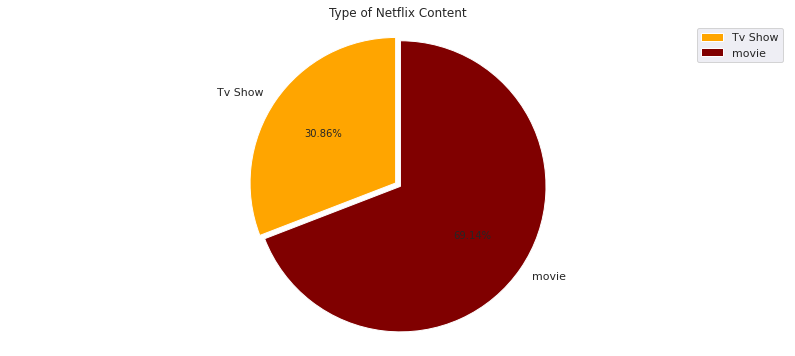

In [110]:
# ploting for pie chart on type feature

plt.figure(figsize =(14,6))
labels = ['Tv Show', 'movie']
plt.pie(data['type'].value_counts().sort_values(),labels=labels, explode =[0.02,0.02],
        autopct='%1.2f%%', colors=['orange', 'maroon'],startangle = 90)
plt.title('Type of Netflix Content')
plt.axis('equal')
plt.legend()
plt.show()

###**Moving Rating Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


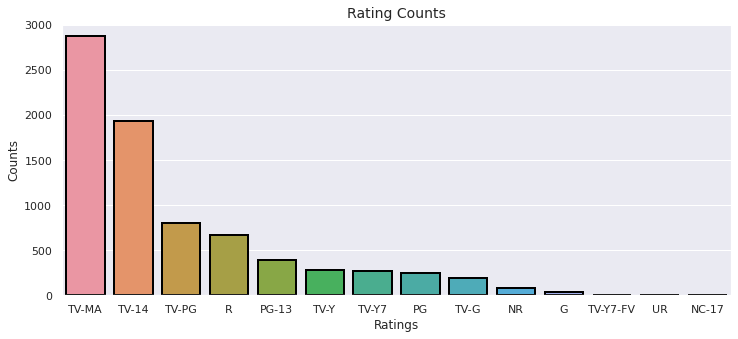

In [111]:
# Ploting the countplot for the Ratings
plt.figure(figsize = (12,5))
ax=sns.countplot('rating', data = data,lw = 2,ec= 'black', 
              order = data['rating'].value_counts(). index)
plt.title('Rating Counts', fontsize = 14)
plt.xlabel('Ratings',fontsize = 12 )
plt.ylabel('Counts', fontsize = 12)
plt.show()

###**Year Month Wise Analysis**

In [114]:
# add new features
data['date_added'] = pd.to_datetime(data['date_added'])
data['year_added'] = data['date_added'].dt.year
data['month_year'] = data['date_added'].dt.month

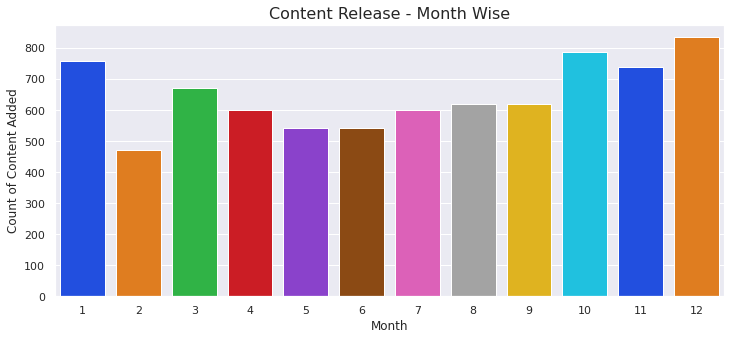

In [115]:
# plot for month wise content release
plt.figure(figsize =(12,5))
sns.countplot(x='month_year', data =data, palette = "bright")
plt.title('Content Release - Month Wise', fontsize = 16)
plt.xlabel('Month', fontsize = 12)
plt.ylabel('Count of Content Added', fontsize = 12)
plt.show()

More of the content is released in holiday season - October, November, December and January.

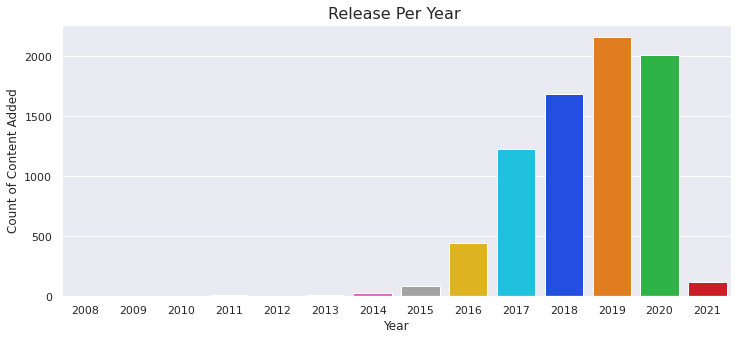

In [116]:
# plot for year wise content release
plt.figure(figsize =(12,5))
sns.countplot(x='year_added', data =data, palette = "bright")
plt.title('Release Per Year ', fontsize = 16)
plt.xlabel('Year', fontsize = 12)
plt.ylabel('Count of Content Added', fontsize = 12)
plt.show()

The number of release have significantly increased after 2015 and have dropped in 2021 becase of Covid 19.



In [159]:
# Checking the trend between the 2010 and 2018

data_2010 = data[data['year_added'] >= 2010] 
data_2018 = data[data['year_added'] <= 2018] 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


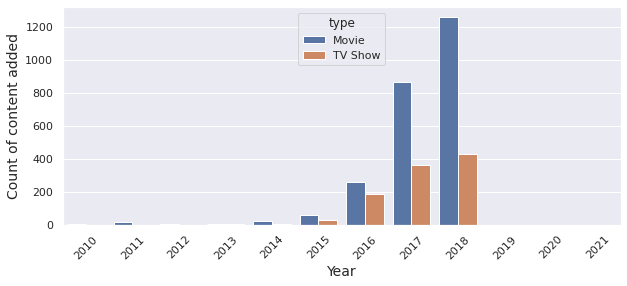

In [164]:
plt.figure(figsize = (10,4))
sns.countplot(data_2010['year_added'], hue= data_2018['type'])
plt.xticks(rotation=45)
plt.xlabel('Year', fontsize = 14)
plt.ylabel('Count of content added',fontsize = 14)
plt.show()

###**Top 10** **countries**

In [117]:
data['main_country'] = data['country'].apply(lambda x : x.split(",")[0])

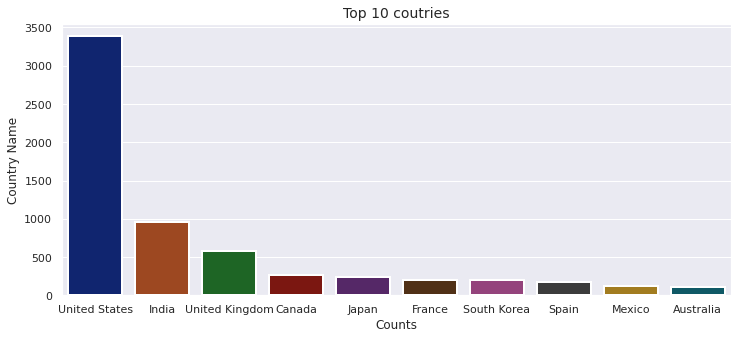

In [118]:

# Top 10 countries on netflix
plt.figure (figsize = (12,5))
ax = sns.countplot(x ='main_country', lw =2,palette = "dark", data= data, order= data['main_country']. value_counts().index[0:10])
plt.title('Top 10 coutries',fontsize=14)
plt.xlabel('Counts', fontsize = 12)
plt.ylabel('Country Name', fontsize = 12)
plt.show()

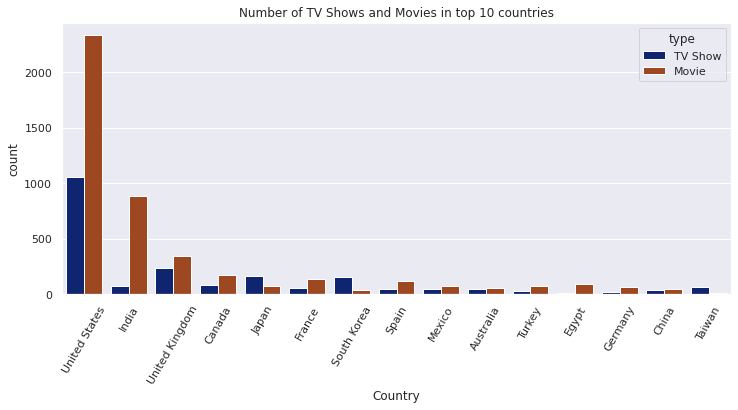

In [131]:
#Number of TV Shows and Movies content in top 10 countries with maximum content
sns.set()
plt.figure(figsize=(12,5))
ax=sns.countplot(x="main_country",data= data,palette = "dark",hue= "type",order = data['main_country'].value_counts().index[0:15])
plt.xticks(rotation=60)
plt.xlabel('Country', fontsize =12)
plt.title("Number of TV Shows and Movies in top 10 countries",fontsize =12)
plt.show()

Most of the countries have more movies than TV shows but for South Korea and Japan it's the opposite. It maybe because KDramas and Anime are more popular in these two countries respectively

###**Top 10 Actors**

In [120]:
# Getting plot for top actors
# Splitting into list

data['cast_name'] = data['cast'].apply(lambda x :  x.split(','))
cast_count = []

# Count movies for each actor
for i in data['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

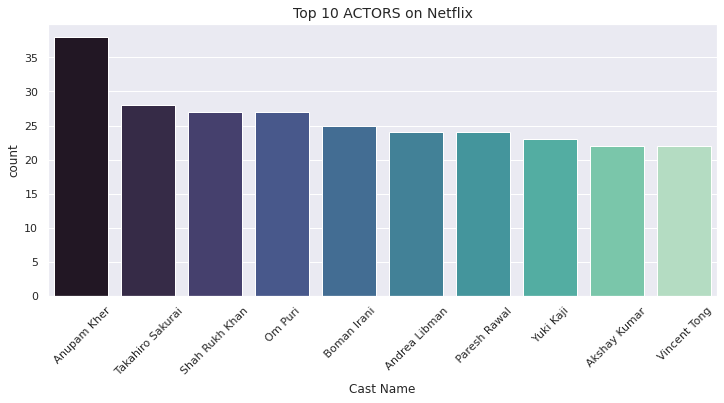

In [137]:
data_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'cast_name', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='cast_name',y='count',data=data_cast_count,palette= "mako")
plt.title("Top 10 ACTORS on Netflix",fontsize=14)
plt.xlabel('Cast Name', fontsize = 12)
plt.xticks(rotation=45)
plt.show()

###**Top 10 Genres**

In [122]:
# Top 10 genres plot
# Splitting into list
data['listed_in'] = data['listed_in'].apply(lambda x :  x.split(','))
genre_count = []
#count genre for each movie
for i in data['listed_in']: 
  genre_count += i
    
genre_dict = dict((i, genre_count.count(i)) for i in genre_count)

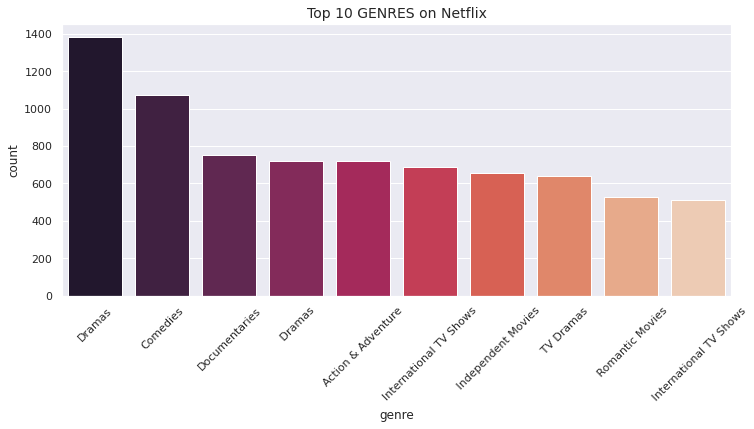

In [132]:
data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data= data_genre_count,palette='rocket')
plt.title("Top 10 GENRES on Netflix",fontsize = 14)
plt.xticks(rotation= 45)
plt.show()

In [112]:
# Creating 2 New dataframes for Movie and Tv Shows 

data_tv =data[data['type'] == 'Tv Show'] 
data_movie = data[data['type'] == 'movie']

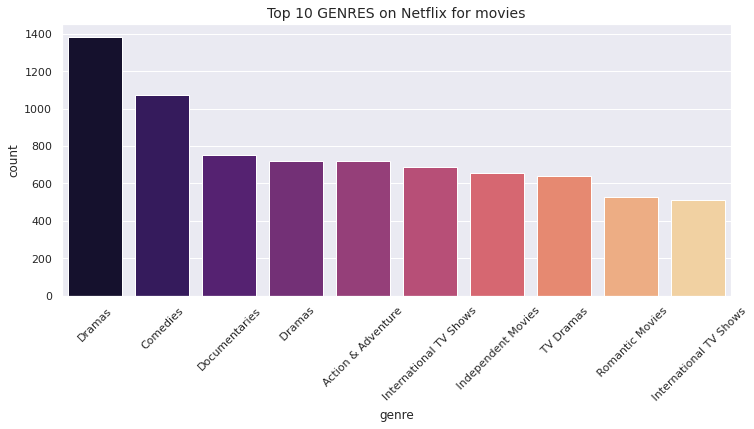

In [146]:
# Top 10 Genre for movies  
data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data=data_genre_count,palette="magma")
plt.title("Top 10 GENRES on Netflix for movies",fontsize = 14)
plt.xticks(rotation=45)
plt.show()

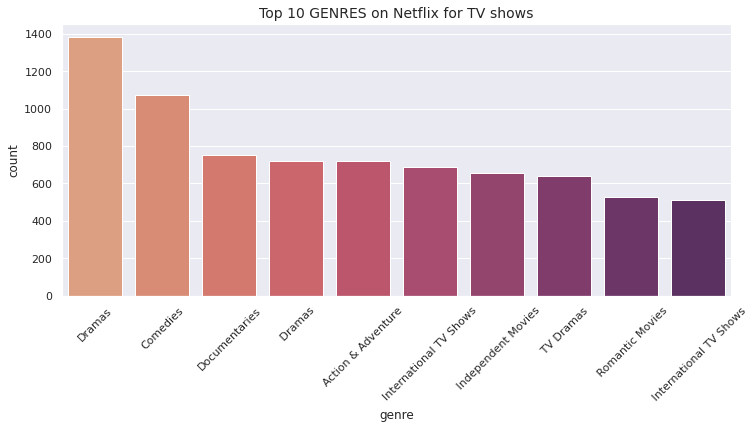

In [144]:
# Top Genre for TV shows

data_genre_count = pd.DataFrame(genre_dict.values(),genre_dict.keys()).reset_index().sort_values(0,ascending=False).rename(
    columns = {'index' : 'genre', 0 : 'count'}).iloc[1:11]
plt.figure(figsize=(12,5))
sns.barplot(x='genre',y='count',data=data_genre_count,palette="flare")
plt.title("Top 10 GENRES on Netflix for TV shows",fontsize = 14)
plt.xticks(rotation=45)
plt.show()

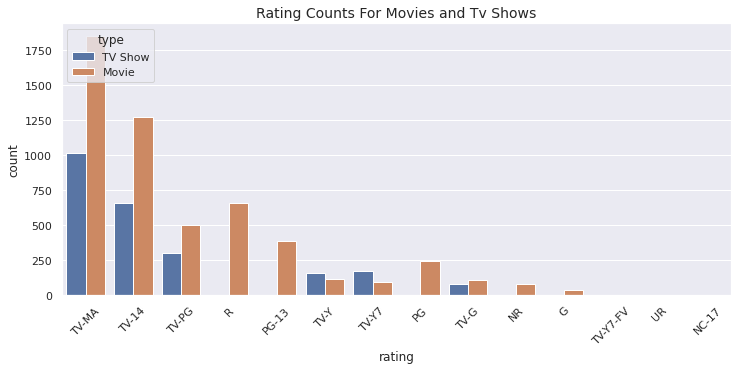

In [149]:
#Plotting the same on a comparison plot

sns.set()
plt.figure(figsize=(12,5))
ax=sns.countplot(x="rating",data= data,hue= "type",order = data['rating'].value_counts().index[0:15])
plt.xticks(rotation=45)
plt.title("Rating Counts For Movies and Tv Shows", fontsize =14)
plt.show()